# Learning Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
import scipy.stats
import json
import requests
from pprint import pprint
from ggplot import *
import csv

## Strings 

In [2]:
"string "*4

'string string string string '

In [3]:
'String'[4]

'n'

In [4]:
len('strings')

7

In [5]:
'Search String'.find('r')

3

In [6]:
'Search String'.find('S', 2)

7

In [7]:
'Search String'.find('S', 8)

-1

In [8]:
'String'[1:4]

'tri'

In [9]:
 'String'.split('i')

['Str', 'ng']

In [10]:
ord('b')

98

In [11]:
chr(98)

'b'

In [12]:
str(45)

'45'

## Lists

We can create a list by writing range(start, stop, step)

In [13]:
range(0, 10, 3)

[0, 3, 6, 9]

In [14]:
range(0, -10, -1)

[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]

In [15]:
range(1, 0)

[]

In [16]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [17]:
range(1, 11)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

You can modify a list.

In [19]:
list = [1, 2, 3, 4, 5, 6]
list[2] = 33
list

[1, 2, 33, 4, 5, 6]

In [20]:
list = [1, 2, 3, 4, 5, 6]
list1 = list[2:6] 
list1

[3, 4, 5, 6]

In [21]:
list = [1, 2, 3, 4, 5, 6]
list.append('element')
list

[1, 2, 3, 4, 5, 6, 'element']

In [22]:
list1 = [1, 2, 3]
list2 = [4, 5]
list1+list2

[1, 2, 3, 4, 5]

In [23]:
list = [1, 2, 3, 4, 'x', 'a']
list.pop(4)

'x'

In [24]:
list = [1, 2, 3, 4, 'x', 'a']
list.pop()

'a'

In [25]:
[].pop()

IndexError: pop from empty list

In [26]:
list = [1, 2, 3, 4, 'x', 'a']
list.index('x')

4

In [27]:
list1 = [1, 2, 3, 4, 'x', 'a']
'a' not in list1, 10 not in list1

(False, True)

## Dictionaries

A Dictionary provides a mapping between keys, which can be values of any immutable type, and values, which can be any value. Because a Dictionary is implemented using a hash table, the time to lookup a value does not increase (significantly) even when the number of keys increases.

Constructing a Dictionary. A Dictionary is a set of zero or more key-value pairs, surrounded by squiggly braces:

In [28]:
x = { 'key1': 'apple', 'key2': 'banana', 'key3': 'pear'}
x['key3']

'pear'

In [29]:
x = { 'key1': 'apple', 'key2': 'banana', 'key3': 'pear'}
'key4' in x, 'key2' in x

(False, True)

In [30]:
import time
time.clock()

0.941415

In [31]:
?except

Object `except` not found.


## Pandas dataframe

It extends the Python's basic data structures and allows better memory management for data analysis. Its more useful than R data.frame data structure. Also Series().  Check this link to understand Pandas datastructures better:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [32]:
import pandas as pd
records = pd.read_csv('turnstile_data_master_with_weather.csv')
frame = pd.DataFrame(records)
frame[:2]

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0,0,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217,553,30.31,42,...,39,30.27,0,0,5,50,60,69,0,0


In [33]:
frame[['Hour', 'UNIT']][:2]

,Hour,UNIT
0,1,R001
1,5,R001


In [34]:
import statsmodels.api as sm
X = frame[['Hour']]
X = sm.add_constant(X)
X    
model = sm.OLS(frame['ENTRIESn_hourly'], X)
results = model.fit()
b0, b1 = results.params[0], results.params[1] 
b0, b1
prediction = b0 + frame['Hour']*b1 
prediction[:2]

0    506.663932
1    744.608606
Name: Hour, dtype: float64

In [35]:
print('maximum per hour =', frame['ENTRIESn_hourly'].max())
print('minimum per hour =', frame['ENTRIESn_hourly'].min())
print('average per hour =', frame['ENTRIESn_hourly'].mean())
print('median per hour =', frame['ENTRIESn_hourly'].median())

('maximum per hour =', 51839.0)
('minimum per hour =', 0.0)
('average per hour =', 1095.3484778440481)
('median per hour =', 279.0)


Below I will try to subset a pandas dataframe in many ways.

In [36]:
frame['ENTRIESn_hourly'][5:20] # To select one column in a dataframe with the range of index numbers.

5     3372
6        0
7       42
8       50
9      316
10     633
11     639
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
Name: ENTRIESn_hourly, dtype: float64

In [37]:
UNIT_counts = frame['UNIT'].value_counts()
print(UNIT_counts[0:5])  # Note that they are listed in a descending order of count by default. 
                         # But the output is not a data frame itself.
UNIT_counts[0:10].mean()


R549    12198
R550     6881
R541     5922
R540     4420
R543     4146
dtype: int64


4579.4

In [38]:
clean_frame = frame['UNIT'].fillna('Missing') ## This is to assign a value to those cells in "unit" column that are missing.
clean_frame[clean_frame == ''] = 'Unknown'  ## To assign a value to those cells that have a value ''.

Now we are going to plot a graph.

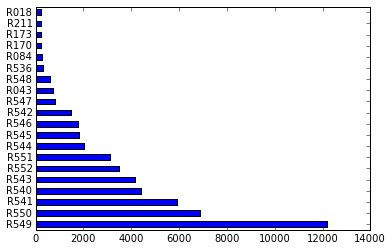

In [39]:
%matplotlib inline  
## Without this line of code, the plot will not show up.
import matplotlib.pyplot as plt
UNIT_counts[:20].plot(kind='barh', rot=0)

In [40]:
results = pd.Series([x.split('-')[2] for x in frame.DATEn.dropna()])
results[:6]

0    01
1    01
2    01
3    01
4    01
5    01
dtype: object

In [41]:
results = pd.Series([x.split('-')[2] for x in frame.DATEn.dropna()])
results[:6]

0    01
1    01
2    01
3    01
4    01
5    01
dtype: object

In [42]:
frame.DATEn.dropna()[:10]

0    2011-05-01
1    2011-05-01
2    2011-05-01
3    2011-05-01
4    2011-05-01
5    2011-05-01
6    2011-05-01
7    2011-05-01
8    2011-05-01
9    2011-05-01
Name: DATEn, dtype: object

In [43]:
frame.DATEn.max(), frame.DATEn.min() ## dataframe-dot-variablename is almost like a Series.

('2011-05-30', '2011-05-01')

In [44]:
len(frame[frame.DATEn.notnull()]), len(frame), len(frame.DATEn.dropna()) 

(131951, 131951, 131951)

In [45]:
x = np.where(frame['DATEn'].str.contains('11-05-15'), 'May', 'Not May')
x

array(['Not May', 'Not May', 'Not May', ..., 'Not May', 'Not May',
       'Not May'], 
      dtype='|S7')

In [46]:
frame.ix[0] ## This shows one of the entries (the first entry in this example) of the data frame.

Unnamed: 0                  0
UNIT                     R001
DATEn              2011-05-01
TIMEn                01:00:00
Hour                        1
DESCn                 REGULAR
ENTRIESn_hourly             0
EXITSn_hourly               0
maxpressurei            30.31
maxdewpti                  42
mindewpti                  35
minpressurei            30.23
meandewpti                 39
meanpressurei           30.27
fog                         0
rain                        0
meanwindspdi                5
mintempi                   50
meantempi                  60
maxtempi                   69
precipi                     0
thunder                     0
Name: 0, dtype: object

In [47]:
m = frame.pivot_table('meantempi', 'UNIT', 'rain', aggfunc = 'mean')
m[:5]

rain,0.0,1.0
UNIT,,
R001,64.927419,62.661290
R002,64.933884,62.758065
R003,64.522124,62.661017
R004,65.008772,62.645161
R005,65.191667,62.636364


In [48]:
newtable = frame.groupby('UNIT').size() ## Here .size() counts the number of times a certain UNIT appeared in the dataframe.
## This can be used to find frequencies of each UNIT. The output is a Series and is not a data frame.
newtable[:5]

UNIT
R001    186
R002    183
R003    172
R004    176
R005    175
dtype: int64

In [49]:
y = frame.groupby(['ENTRIESn_hourly', x])
y
agg_counts = y.size().unstack().fillna(0)
agg_counts[:10]

,May,Not May
ENTRIESn_hourly,,
0,531,12810
1,75,1692
2,57,1198
3,42,978
4,35,863
5,26,787
6,27,721
7,36,664
8,29,636


In [50]:
busyunits = frame.index[newtable>= 173]
mean_ratings = m.ix[busyunits]

## Merging pandas data frames.

You can merge two files using the pandas function "merge". E.g. data = pd.merge(pd.merge(ratings, users), movies) .
Here we are merging three data frames - ratings, users, and movies. Pandas will figure out how to merge them but the resulting data frame "data" will contain all the variables that each of the tables separately had. 

## CSV Reader/Writer Tutorial

In [51]:
import csv
# Create file input object f_in to work with in_data.csv file.
f_in = open('in_data.csv', 'r')
# Create file output object f_out to write to the new 'out_data.csv'
f_out = open('out_data.csv', 'w')

#Create csv readers and writers based on our file objects
reader_in = csv.reader(f_in, delimiter=',')
writer_out = csv.writer(f_out, delimiter=',')

# Skip the first line because it contains headers
reader_in.next()

for line in reader_in:
    type_chocolate = line[0]
    # For each line, the format will be:
    # type_choco, batch_id, cocoa, milk, sugar
    line_1=[type_chocolate, line[1], line[2], line[3], line[4]]
    line_2=[type_chocolate, line[5], line[6], line[7], line[8]]
    writer_out.writerow(line_1)
    writer_out.writerow(line_2)
    
f_in.close()
f_out.close()

IOError: [Errno 2] No such file or directory: 'in_data.csv'

## Reading data

You can open a remote file from a url in python by the following method:


In [52]:
from urllib2 import urlopen
url = 'http://www.ats.ucla.edu/stat/data/hsb2.csv'
fp = urlopen(url)
df = pd.read_table(url, delimiter =",")
df[:4]

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56


Lets try to do some analysis. I want to load some csv file and do analysis. The file is located at '/media/anirban/Ubuntu/Downloads/turnstile_data_master_with_weather.csv' .

In [53]:
df = pd.read_csv('turnstile_data_master_with_weather.csv')


The code below does not work. Need to figure out how to generate a plot.

<module 'matplotlib.pyplot' from '/home/anirban/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>


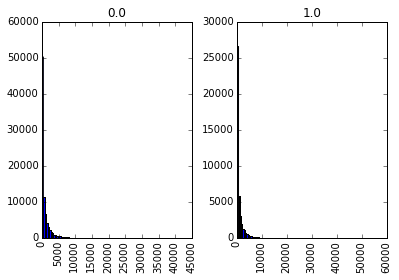

In [54]:
def entries_histogram(turnstile_weather):
    '''
    Before we perform any analysis, it might be useful to take a
    look at the data we're hoping to analyze. More specifically, let's 
    examine the hourly entries in our NYC subway data and determine what
    distribution the data follows. This data is stored in a dataframe
    called turnstile_weather under the ['ENTRIESn_hourly'] column.
    
    Let's plot two histograms on the same axes to show hourly
    entries when raining vs. when not raining. Here's an example on how
    to plot histograms with pandas and matplotlib:
    turnstile_weather['column_to_graph'].hist()
    
    Your histogram may look similar to bar graph in the instructor notes below.
    
    You can read a bit about using matplotlib and pandas to plot histograms here:
    http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms
    
    You can see the information contained within the turnstile weather data here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    plt.figure()
    pd.DataFrame.hist(turnstile_weather, column='ENTRIESn_hourly', by='rain', bins=100) # your code here to plot a historgram for hourly entries when it is raining
    #turnstile_weather['ENTRIESn_hourly'].hist() # your code here to plot a historgram for hourly entries when it is not raining
    return plt

print(entries_histogram(df))

In [55]:
def mann_whitney_plus_means(turnstile_weather):
    '''
    This function will consume the turnstile_weather dataframe containing
    our final turnstile weather data. 
    
    You will want to take the means and run the Mann Whitney U-test on the 
    ENTRIESn_hourly column in the turnstile_weather dataframe.
    
    This function should return:
        1) the mean of entries with rain
        2) the mean of entries without rain
        3) the Mann-Whitney U-statistic and p-value comparing the number of entries
           with rain and the number of entries without rain
    
    You should feel free to use scipy's Mann-Whitney implementation, and you 
    might also find it useful to use numpy's mean function.
    
    Here are the functions' documentation:
    http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    
    You can look at the final turnstile weather data at the link below:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv
    '''
    
    ### YOUR CODE HERE ###
    turnstile_weather1 = turnstile_weather.loc[turnstile_weather['rain']==0]    
    turnstile_weather2 = turnstile_weather.loc[turnstile_weather['rain']==1]  
    with_rain_mean = turnstile_weather2['ENTRIESn_hourly'].mean()
    without_rain_mean = turnstile_weather1['ENTRIESn_hourly'].mean()
    U, p = scipy.stats.mannwhitneyu(turnstile_weather1['ENTRIESn_hourly'], turnstile_weather2['ENTRIESn_hourly'])
    return with_rain_mean, without_rain_mean, U, p

mann_whitney_plus_means(df)

(1105.4463767458733, 1090.278780151855, 1924409167.0, 0.024999912793489721)

In [56]:
import numpy as np
import pandas
from ggplot import *

"""
In this question, you need to:
1) implement the compute_cost() and gradient_descent() procedures
2) Select features (in the predictions procedure) and make predictions.

"""

def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

def compute_cost(features, values, theta):
    """
    Compute the cost function given a set of features / values, 
    and the values for our thetas.
    
    This can be the same code as the compute_cost function in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    # your code here
    m = len(values)
    sum_of_square_errors = np.square(np.dot(features, theta) - values).sum()
    cost = sum_of_square_errors / (2*m)

    return cost

def gradient_descent(features, values, theta, alpha, num_iterations):
    """
    Perform gradient descent given a data set with an arbitrary number of features.
    
    This can be the same gradient descent code as in the lesson #3 exercises,
    but feel free to implement your own.
    """
    
    m = len(values)
    cost_history = []

    for i in range(num_iterations):
        # your code here
        predicted_values = np.dot(features, theta)
        theta = theta - alpha / m * np.dot((predicted_values - values), features)
        
        cost = compute_cost(features, values, theta)
        cost_history.append(cost)
    return theta, pandas.Series(cost_history)

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~15%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this computer on your own computer, locally. 
    
    
    If you'd like to view a plot of your cost history, uncomment the call to 
    plot_cost_history below. The slowdown from plotting is significant, so if you 
    are timing out, the first thing to do is to comment out the plot command again.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a 
    smaller number for num_iterations if that's the case.
    
    If you are using your own algorithm/models, see if you can optimize your code so 
    that it runs faster.
    '''
    # Select Features (try different features!)
    features = dataframe[['Hour']]
    # features = dataframe[['rain', 'precipi', 'Hour']]
    
    # Add UNIT to features using dummy variables
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    m = len(values)

    features, mu, sigma = normalize_features(features)
    features['ones'] = np.ones(m) # Add a column of 1s (y intercept)
    
    # Convert features and values to numpy arrays
    features_array = np.array(features)
    values_array = np.array(values)

    # Set values for alpha, number of iterations.
    alpha = 0.1 # please feel free to change this value
    num_iterations = 75 # please feel free to change this value

    # Initialize theta, perform gradient descent
    theta_gradient_descent = np.zeros(len(features.columns))
    theta_gradient_descent, cost_history = gradient_descent(features_array, 
                                                            values_array, 
                                                            theta_gradient_descent, 
                                                            alpha, 
                                                            num_iterations)
    
    plot = None
    # -------------------------------------------------
    # Uncomment the next line to see your cost history
    # -------------------------------------------------
    plot = plot_cost_history(alpha, cost_history)
    # 
    # Please note, there is a possibility that plotting
    # this in addition to your calculation will exceed 
    # the 30 second limit on the compute servers.
    
    predictions = np.dot(features_array, theta_gradient_descent)
    return predictions, plot


def plot_cost_history(alpha, cost_history):
   """This function is for viewing the plot of your cost history.
   You can run it by uncommenting this

       plot_cost_history(alpha, cost_history) 

   call in predictions.
   
   If you want to run this locally, you should print the return value
   from this function.
   """
   cost_df = pandas.DataFrame({
      'Cost_History': cost_history,
      'Iteration': range(len(cost_history))
   })
   return ggplot(cost_df, aes('Iteration', 'Cost_History')) + \
      geom_point() + ggtitle('Cost History for alpha = %.3f' % alpha )





In [57]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def plot_residuals(turnstile_weather, predictions):
    '''
    Using the same methods that we used to plot a histogram of entries
    per hour for our data, why don't you make a histogram of the residuals
    (that is, the difference between the original hourly entry data and the predicted values).
    Try different binwidths for your histogram.

    Based on this residual histogram, do you have any insight into how our model
    performed?  Reading a bit on this webpage might be useful:

    http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm
    '''
    
    plt.figure()
    (turnstile_weather['ENTRIESn_hourly'] - predictions).hist(bins=30)
    return plt



In [58]:
frame = pandas.read_csv('turnstile_data_master_with_weather.csv')
frame[:2]
frame.dtypes
#newtable = (frame.groupby(frame['Hour'], 'ENTRIESn_hourly').mean())

Unnamed: 0           int64
UNIT                object
DATEn               object
TIMEn               object
Hour                 int64
DESCn               object
ENTRIESn_hourly    float64
EXITSn_hourly      float64
maxpressurei       float64
maxdewpti          float64
mindewpti          float64
minpressurei       float64
meandewpti         float64
meanpressurei      float64
fog                float64
rain               float64
meanwindspdi       float64
mintempi           float64
meantempi          float64
maxtempi           float64
precipi            float64
thunder            float64
dtype: object

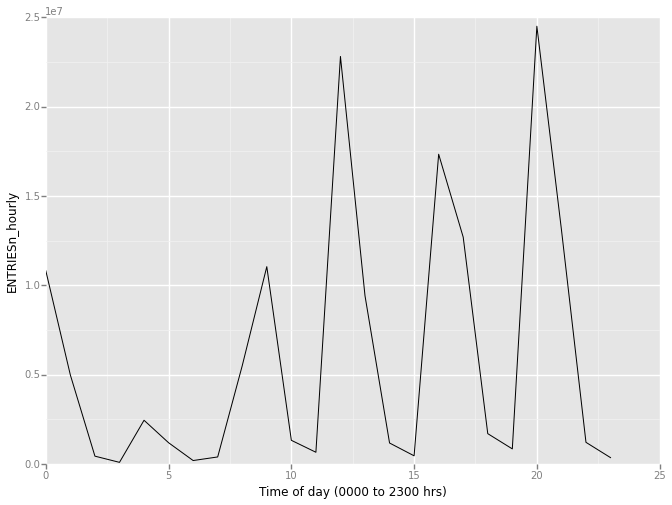

<ggplot: (8749609106077)>

In [59]:
d = pandas.DataFrame(frame.groupby('Hour').sum())
d.index
ggplot(d, aes(d.index, 'ENTRIESn_hourly')) + geom_line() + xlab('Time of day (0000 to 2300 hrs)')

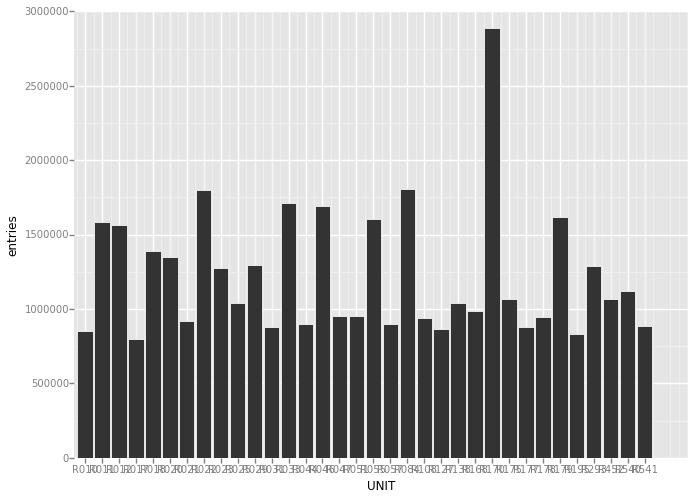

<ggplot: (8749561163241)>

In [73]:
d = pandas.DataFrame(frame.groupby('UNIT').sum())
d = d.sort(columns='ENTRIESn_hourly')
d = d[d > 800000]
#d['ENTRIESn_hourly']
d = pd.DataFrame({'UNIT': (d.sort(columns='ENTRIESn_hourly').index), 'entries': d.sort(columns='ENTRIESn_hourly')['ENTRIESn_hourly']})
#d['UNIT']
#d['UNIT'].astype(basestring)
#d.dtypes
ggplot(d, aes('UNIT', 'entries')) + geom_bar(stat="bar")

In [61]:
d

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
UNIT,,,,,,,,,,,,,,,,,,
R464,10870424,1660,0,0,4895.85,9329,7873,4872.84,8592,4884.84,26,54,911,9162,10486,11711,26.31,0
R338,11627848,1773,4464,19759,5255.28,10043,8471,5230.36,9252,5243.37,33,60,984,9840,11263,12583,32.65,0
R418,11548550,1923,6524,8692,5285.88,10046,8461,5261.03,9243,5274.00,29,56,946,9889,11333,12668,24.78,0
R459,7923399,836,7289,280,2488.36,5332,4768,2476.37,5057,2482.77,27,42,466,5060,5641,6165,26.64,0
R415,12218121,2051,7921,2615,5586.00,10641,8959,5560.11,9793,5573.59,30,61,1036,10442,11959,13365,31.58,0
R417,10785538,1583,15210,16072,4476.48,8822,7623,4455.00,8232,4466.30,30,60,802,8468,9620,10679,31.08,0
R336,10643192,1639,18478,52448,4864.93,9237,7765,4842.33,8492,4853.96,27,56,900,9063,10379,11598,29.59,0
R165,11902235,2230,21880,0,5585.83,10591,8901,5560.01,9734,5573.43,30,60,1032,10423,11941,13348,31.08,0
R455,11194578,1705,23708,73534,5045.27,9637,8139,5021.77,8881,5034.03,29,56,928,9452,10814,12073,30.31,0
